<a name='1'></a>
## 1 - Packages

In [37]:
# Package imports
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from dnn_app_utils_v3 import *

np.random.seed(1)

<a name='2'></a>
# 2 - Load the Dataset and Normalization

In [38]:
filepath="FinalData.csv"

df = pd.read_csv(filepath, delimiter=';', decimal='.')

feature_cols = ['CO2_livingroom', 'light_livingroom', 'rh_livingroom', 
                'temp_livingroom', 'temp_outdoor']

X = df[feature_cols].values.astype(float)
y = df['presence_livingroom'].values.astype(float)

# Split into train and test (80-20)
n_samples = X.shape[0]
n_train = int(0.8 * n_samples)

indices = np.arange(n_samples)
np.random.seed(42)
np.random.shuffle(indices)

train_set_x_orig, test_set_x_orig = X[indices[:n_train]], X[indices[n_train:]]
train_set_y_orig, test_set_y_orig = y[indices[:n_train]], y[indices[n_train:]]

In [39]:
# Normalization process
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 1. Scaler for FEATURES (X)
# Use 'x_scaler' for input data
x_scaler = MinMaxScaler(feature_range=(0,1))
train_set_x_normalized = x_scaler.fit_transform(train_set_x_orig)
test_set_x_normalized = x_scaler.transform(test_set_x_orig) # Use transform for test set

# 2. Scaler for LABELS (Y)
# Use 'y_scaler' for output data
y_scaler = MinMaxScaler(feature_range=(0,1))

# Reshape Y from (m,) to (m, 1) for the MinMaxScaler's fit_transform method
train_set_y_reshaped = train_set_y_orig.reshape(-1, 1)
test_set_y_reshaped = test_set_y_orig.reshape(-1, 1)

# Fit and transform Y data
train_set_y_normalized = y_scaler.fit_transform(train_set_y_reshaped)
test_set_y_normalized = y_scaler.transform(test_set_y_reshaped)

# Transpose X data for the Deep NN (shape: (n_x, m))
train_set_x_normalized = train_set_x_normalized.T     
test_set_x_normalized = test_set_x_normalized.T

# Transpose Y data for the Deep NN (shape: (1, m))
train_set_y_normalized = train_set_y_normalized.T
test_set_y_normalized = test_set_y_normalized.T

In [40]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("train_set_x shape: " + str(train_set_x_normalized.shape))
print ("train_set_y shape: " + str(train_set_y_normalized.shape))
print ("test_set_x shape: " + str(test_set_x_normalized.shape))
print ("test_set_y shape: " + str(test_set_y_normalized.shape))

Number of training examples: m_train = 1189
Number of testing examples: m_test = 298
train_set_x shape: (5, 1189)
train_set_y shape: (1, 1189)
test_set_x shape: (5, 298)
test_set_y shape: (1, 298)


<a name='5'></a>
## 3 - L-layer Neural Network


In [41]:
### CONSTANTS ###
layers_dims = [5, 20, 10, 5, 1] #  4-layer model

In [42]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.85, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

<a name='5-1'></a>
## Train the model
The cost should decrease on every iteration. 

In [43]:
parameters, costs = L_layer_model(train_set_x_normalized, train_set_y_normalized, layers_dims, num_iterations = 3000, print_cost = False)

Cost after iteration 2999: 0.5881293426213211


In [44]:
pred_train = predict(train_set_x_normalized, train_set_y_normalized, parameters)

Accuracy: 62.239619660210366


In [45]:
pred_test = predict(test_set_x_normalized, test_set_y_normalized, parameters)

Accuracy: 62.00620394129312


In [46]:
# Step 1: Get the normalized prediction (Y_prediction_test will have shape (1, 298))
# Assuming the 'predict' function signature is 'predict(X_test, Y_test, parameters)'
Y_prediction_test = predict(test_set_x_normalized, test_set_y_normalized, parameters)

# Step 2: Use the 'y_scaler' to inverse transform the prediction.
# The prediction must be transposed back to (298, 1) before inverse_transform.
Y_prediction_test_real_scale = y_scaler.inverse_transform(Y_prediction_test.T)

Accuracy: 62.00620394129312


<a name='6'></a>
##  6 - Results Analysis

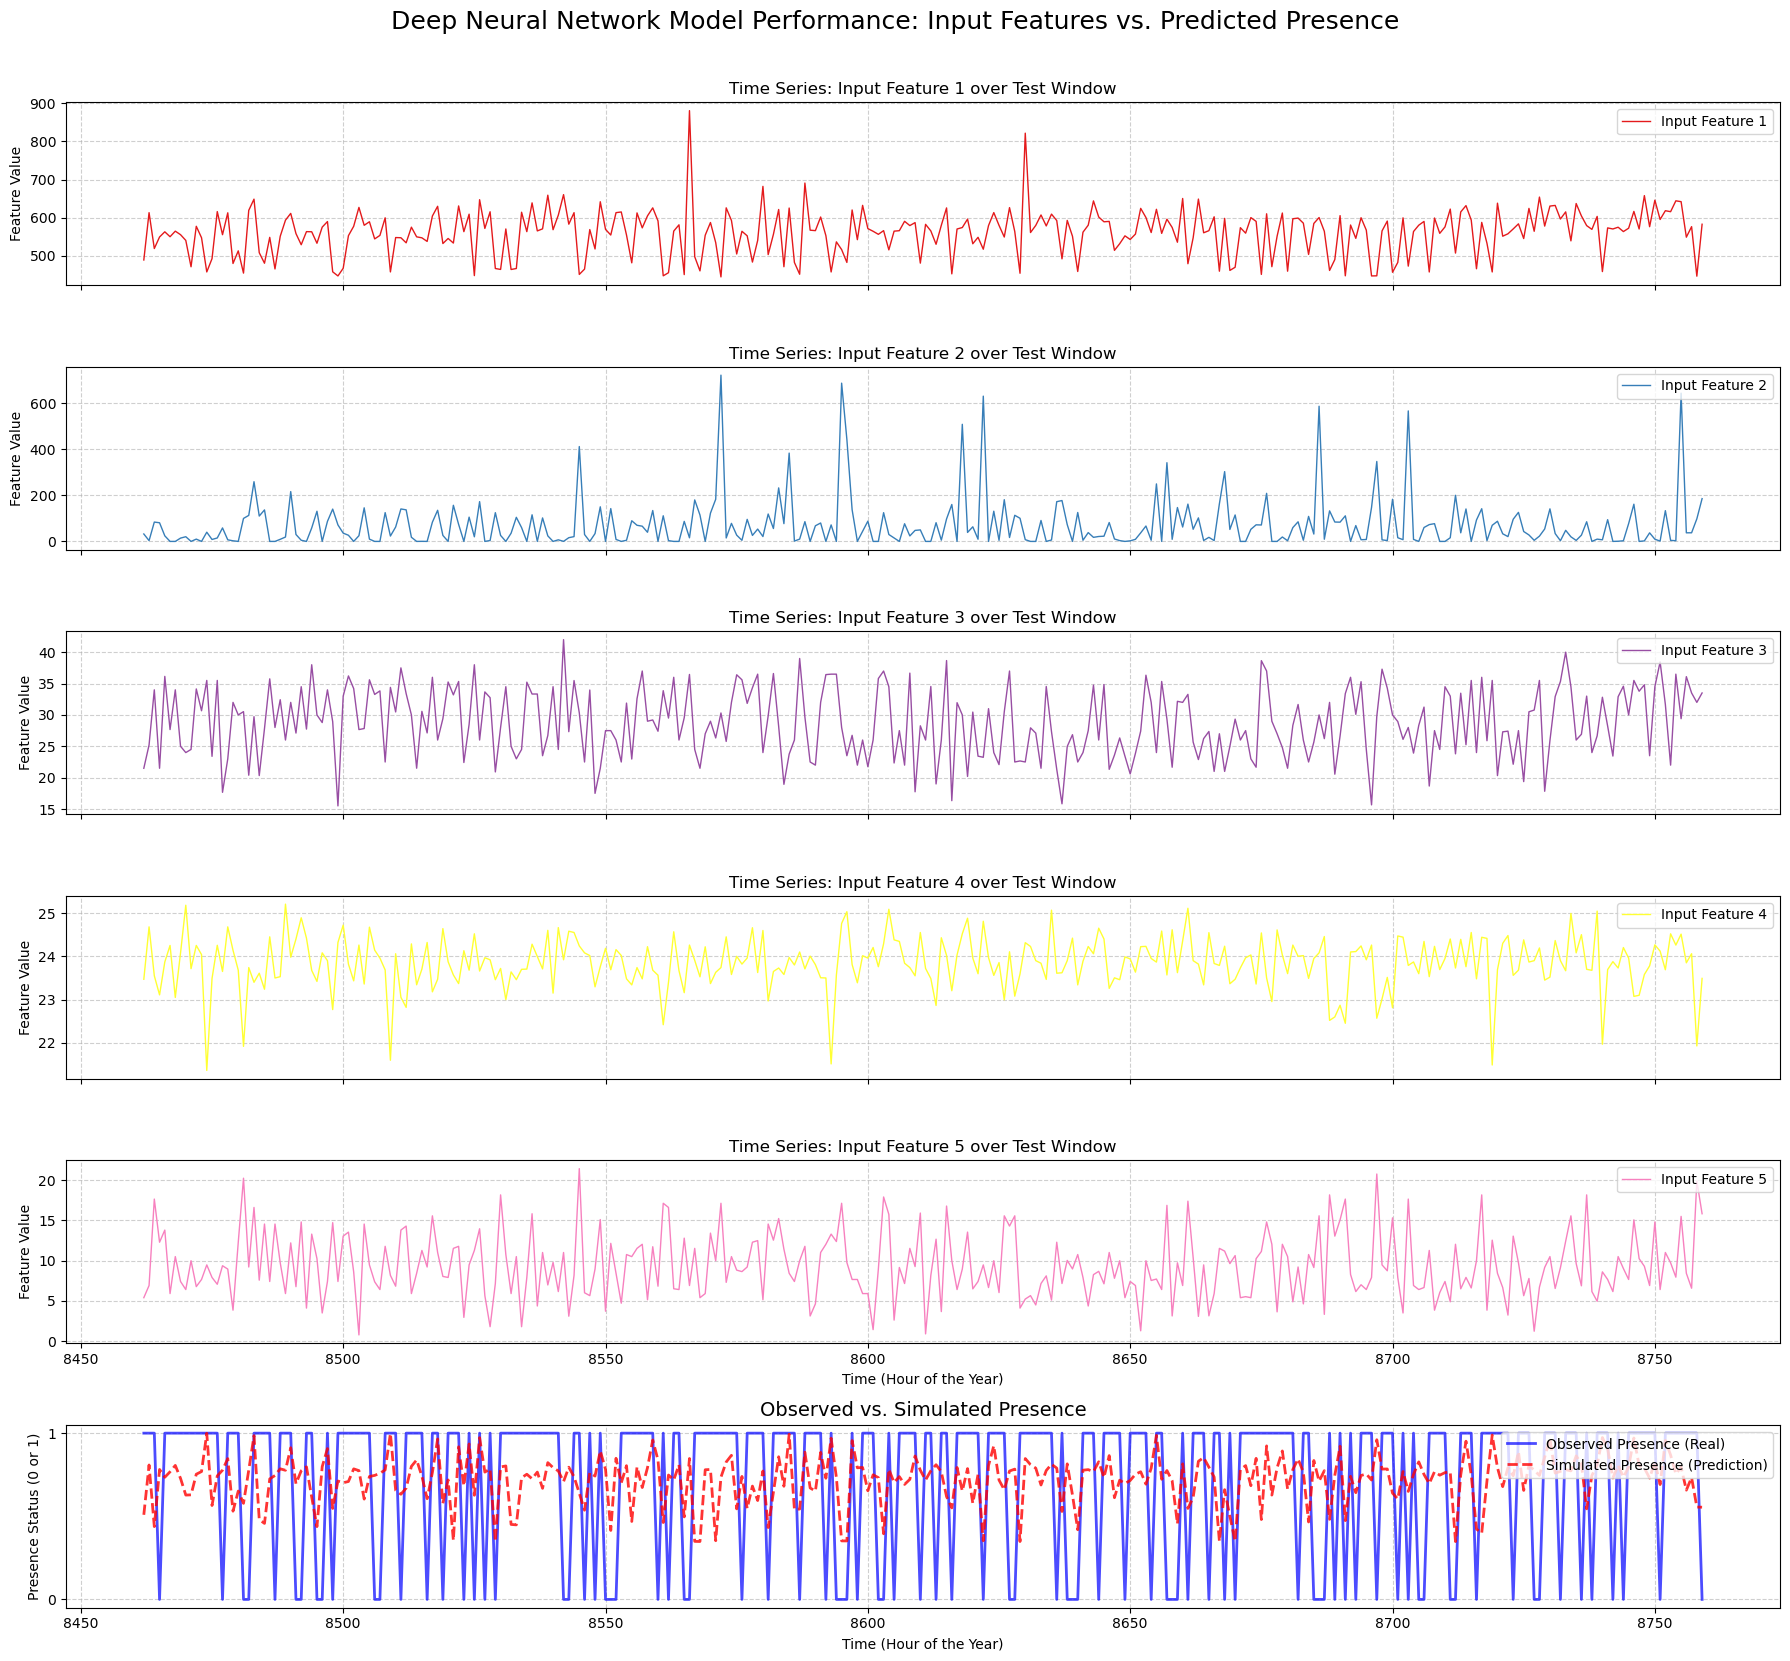

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# --- Assumed Variables from the Notebook (Ensure these are defined) ---
# test_set_x_orig: The original un-normalized test input features (shape: (m, n_x)) -> used for feature visualization
# test_set_y_orig: The original un-normalized test labels (shape: (m,))
# Y_prediction_test_real_scale: The inverse-transformed prediction results (shape: (m, 1))
# train_set_x_orig: Used to infer the names of the features if available, otherwise generic names are used.

# --- 1. Prepare Data for Plotting ---

# Dimensions and time index
test_size = test_set_y_orig.shape[0]
n_x = test_set_x_orig.shape[1] # Number of features (should be 5)
start_hour = 8760 - test_size  # Assuming test data is the tail end of an 8760-hour year
time_index_hours = np.arange(start_hour, 8760, 1)

# Ensure Y_prediction_test_real_scale is a 1D array for plotting compatibility
y_pred_flat = Y_prediction_test_real_scale.flatten()

# Feature names (customize these if you know the actual names of your 5 features)
feature_names = [f'Input Feature {i+1}' for i in range(n_x)]

# --- 2. Create the Multi-Plot Figure ---

# Create a figure with a flexible grid: 5 smaller subplots for X, 1 larger subplot for Y
fig = plt.figure(figsize=(18, 18))
plt.suptitle('Deep Neural Network Model Performance: Input Features vs. Predicted Presence', fontsize=18, y=0.95)

# 2.1. Plot Input Features (X)
for i in range(n_x):
    # Create an axis for the i-th feature (6 rows, 1 column, i-th plot)
    ax = plt.subplot(n_x + 1, 1, i + 1) 
    
    # Plot the i-th column of the original test set features
    ax.plot(time_index_hours, test_set_x_orig[:, i], label=feature_names[i], color=plt.cm.Set1(i/n_x), linewidth=1)
    
    ax.set_title(f'Time Series: {feature_names[i]} over Test Window', fontsize=12)
    ax.set_ylabel('Feature Value')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(loc='upper right')
    
    # Only show x-label on the last input feature plot
    if i < n_x - 1:
        ax.tick_params(labelbottom=False)
    else:
        ax.set_xlabel('Time (Hour of the Year)')


# 2.2. Plot Observed vs. Simulated Presence (Y)
ax_y = plt.subplot(n_x + 1, 1, n_x + 1) 

# Observed (Real) Data
ax_y.plot(time_index_hours, test_set_y_orig, 
          label='Observed Presence (Real)', 
          color='blue', 
          linewidth=2, 
          alpha=0.7)

# Simulated (Predicted) Data
ax_y.plot(time_index_hours, y_pred_flat, 
          label='Simulated Presence (Prediction)', 
          color='red', 
          linestyle='--', 
          linewidth=2, 
          alpha=0.8)

ax_y.set_title('Observed vs. Simulated Presence', fontsize=14)
ax_y.set_xlabel('Time (Hour of the Year)')
ax_y.set_ylabel('Presence Status (0 or 1)')
ax_y.legend(loc='upper right')
ax_y.grid(True, linestyle='--', alpha=0.6)
ax_y.set_yticks([0, 1]) # Ensure y-axis only shows 0 and 1

# Adjust layout to prevent subplots from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.94])

plt.show()